In [6]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Supervised Learning Review

### Notation
$\left(x_{i}, y_{i}\right) \in \mathbb{R}$ is the $i$ -th training example tuple, where $x_{i}$ is its set of features and $y_{i}$ its label.
The training data is denoted by $D_{\text {train }}=\left\{\left(x_{i}, y_{i}\right)\right\}_{i=1}^{N}$

### Score Function (Model Evaluation)
Let $\hat{y}_{i}=f\left(x_{i} ; \mathbf{W}\right)$ be our model prediction of the label of example $i$

The score function is our way to evaluate the goodness of a model: 



$$F\left(D_{\text {train }} ; \mathbf{W}\right) =\underbrace{L\left(D_{\text {train }} ; \mathbf{W}\right)}_{\text {Training score}\\ \text {measures how well} \\ {\text{describes } D_{train}}} + \underbrace{\Omega\left(\mathbf{W}\right)}_{\text {Regularization,} \\ \text {Parameter prior}}  $$

where
$$
L\left(D_{\text {train }} ; \mathbf{W}\right)=\sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}\right)
$$

Examples:
  - Training score:
  - Square loss: $l\left(y_{i}, \hat{y}_{i}\right)=\left(y_{i}-\hat{y}_{i}\right)^{2}$
  
* Cross-entropy loss (binary labels): $l\left(y_{i}, \hat{y}_{i}\right)=-y_{i} \log \left(\hat{y}_{i}\right)-\left(1-y_{i}\right) \log \left(1-\hat{y}_{i}\right)$
  - Regularization:
  - L2 norm: $\Omega(\mathbf{W})=\lambda\|\mathbf{W}\|^{2}$
  - L1 norm: $\Omega(\mathbf{W})=\lambda\|\mathbf{W}\|_{1}$

## Consider 1D Regression Problem (x,y)

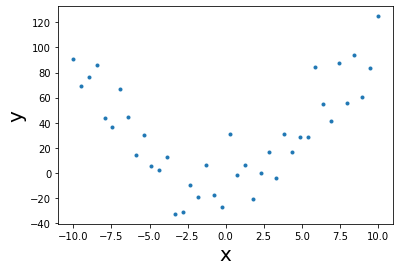

In [2]:
# No randomness

np.random.seed(42)

#Generate N points for training data

N = 40

# get 1000 equally spaced points between -10 and 10
x = np.linspace(-10, 10, N)

# calculate the y value for each element of the x vector
y = x**2 + 2*x + 1 + np.random.normal(0,20,N)

def plotdata():
    fig, ax = plt.subplots()
    plt.xlabel("x", fontsize=20)
    plt.ylabel("y", fontsize=20)
    ax.plot(x, y,'.')
    
plotdata()
plt.show()

## Regression Tree (CART) Review

Regression tree (also known as classification and regression tree) is a set of decision rules (a decision tree) that contains a single prediction at each leaf node.

**Example of tree for regression problem given below**

![](regression_tree.png)

## Tree Ensembles
Thinking of a regression tree as a function that maps the attributes to the score:

**Model**: assuming we have $K$ trees, $f_{1}, \ldots, f_{K}$

$$
\hat{y}_{i}=\sum_{k=1}^{K} f_{k}\left(x_{i}\right), \quad f_{k} \in \mathcal{F}
$$

where $\mathcal{F}$ is the space of **all** functions containing **all regression trees**.

Thinking of tree search as an optimization problem (consider a score function where more is worse):

$$
\mathbf{W}^{\star}=\arg \min _{\mathbf{w}} F\left(D_{\text {train }} ; \mathbf{W}\right)=\arg \min _{\mathbf{W}} \sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}\right)+\sum_{k=1}^{K} \Omega\left(f_{k}\right)
$$

where

$$
\mathbf{W}=\left(f_{1}, \ldots, f_{K}\right)
$$

and $\Omega\left(f_{k}\right)$ is a penalty for **tree complexity**.

Possible ways to define $\Omega ?$

* Number of nodes in the tree 

* Tree depth

* L2 norm of the leaf weights

**"Small" problem with the above optimization?**
Learning the simplest (smallest) decision tree is an NP-complete problem [Hyafil \& Rivest'76]

## Trees: Optimization vs Heuristics

When we talk about learning decision trees, we are often referring to heuristics
 - Split by information gain (greedy search)
 - Prune the tree (regularization on number of nodes)
 - Maximum depth (regularization by constraining the space of possible functions)

## Boosting (additive training)

Our real objective is still
$$
\mathbf{W}^{\star}=\arg \min _{\mathbf{W}} \sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}\right)+\sum_{k=1}^{K} \Omega\left(f_{k}\right)
$$
but we still cannot use gradient descent to find $\mathbf{W}$ since the search space are trees, not differentiable functions...
...but there is another approximation we can make: **Additive training (Boosting)**

## Boosting (Additive Training)
Start from constant prediction, **add new functions** sequentially
$$
\begin{aligned}
\hat{y}_{i}^{(0)} &=0 \\
\hat{y}_{i}^{(1)} &=\hat{y}_{i}^{(0)}+f_{1}\left(x_{i}\right) \\
& \vdots \\
\hat{y}_{i}^{(K)} &=\hat{y}_{i}^{(K-1)}+f_{K}\left(x_{i}\right)
\end{aligned}
$$
**How can we decide which $f$ to add at each iteration?**

Look at the objective function.

$$
\mathbf{W}^{\star}=\arg \min _{\mathbf{W}} \sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}\right)+\sum_{k=1}^{K} \Omega\left(f_{k}\right)
$$
We need to add $f_{k}$ to the prediction
$$
\hat{y}_{i}^{(k)}=\hat{y}_{i}^{(k-1)}+f_{k}\left(x_{i}\right)
$$
that will minimize the score.
The score function at the $k$ -th step is:
$$
\text { Score }^{(k)}=\sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}^{(k-1)}+f_{k}\left(x_{i}\right)\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right)
$$

## Square loss example
If the score is the square loss,
$$
\begin{aligned}
\operatorname{Score}^{(k)} &=\sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}^{(k-1)}+f_{k}\left(x_{i}\right)\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right) \\
&=\sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}^{(k-1)}+f_{k}\left(x_{i}\right)\right)^{2}+\sum_{m=1}^{k} \Omega\left(f_{m}\right) \\
&=\sum_{i=1}^{N}\left(2\left(y_{i}-\hat{y}_{i}^{(k-1)}\right) f_{k}\left(x_{i}\right)+f_{k}\left(x_{i}\right)^{2}\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right)+\text { constant }
\end{aligned}
$$
The value $h_{i}^{(k)}=\left(y_{i}-\hat{y}_{i}^{(k-1)}\right)$ is called the residual of round $k-1$

**Translation**: The problem now becomes one of finding a tree $f_{k}$ that cares about the correct prediction of example $i$ with a weight proportional to the residual $h_{i}^{(k)},$ while trying to keep the overall predicted values not too large due to the $f_{k}\left(x_{i}\right)^{2}$ term.

This decomposition works for the square loss, but what about cross-entropy or other forms of loss?

##  What about other loss functions?
$$
\operatorname{Score}^{(k)}=\sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}^{(k-1)}+f_{k}\left(x_{i}\right)\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right)
$$

Consider the Taylor expansion of the score:
- Recall that $f(x+\Delta x) \approx f(x)+\frac{d}{d x} f(x) \Delta x$

- Define

$$
h_{i}^{(k)}=\frac{\partial}{\partial \hat{y}^{(k-1)}} l\left(y_{i}, \hat{y}^{(k-1)}\right)
$$

- Then, the Taylor series approximation yields:

$$
\begin{aligned}
\operatorname{Score}^{(k)} & \approx \sum_{i=1}^{N}\left(l\left(y_{i}, \hat{y}_{i}^{(k-1)}\right)+h_{i}^{(k)} f_{k}\left(x_{i}\right)\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right) \\
& \approx \sum_{i=1}^{N} h_{i}^{(k)} f_{k}\left(x_{i}\right)+\Omega\left(f_{k}\right)+\text { constant }
\end{aligned}
$$

  where in the last equation we used the fact that at the $k$ -th iteration, both
 


$l\left(y_{i}, \hat{y}_{i}^{(k-1)}\right)$   and $ \sum_{m=1}^{k-1} \Omega\left(f_{m}\right)$  are constant. 


**Q**: Which algorithm do we get if $y_{i} \in\{-1,1\}$ and the loss is $l\left(y_{i}, \hat{y}_{i}^{(k)}\right)=\exp \left(-y_{i} \hat{y}_{i}^{(k)}\right) ?$

## How can we further improve gradient boosting for trees?

So far, at each leaf gives a constant value, determined while we build the tree.

In what follows, we decouple these two procedures: learning the tree and giving a prediction once we reach a leaf.

* Suppose we have learned tree $f_{k}$

* Let $q^{(k)}\left(x_{i}\right)$ be the leaf index of example $x_{i}$ once we follow the tree.

* We define the output of leaf $q^{(k)}\left(x_{i}\right)$ of tree $f_{k}$ as a parameter $w_{q^{(k)}\left(x_{i}\right)} \in \mathbb{R}$ that we will also try to learn. And let $\mathbf{w}$ be a $J$ -dimensional vector with all the leaf outputs.

* Let $J$ be the number of leaves of $f_{k}$

Let $I_{j}^{(k)}=\left\{i: q^{(k)}\left(x_{i}\right)=j\right\}$ be subset of the training data that belongs to leaf $j=1, \ldots, J$

We can rewrite our score function as:

\begin{aligned}
\mathrm{Score}^{(k)} & \approx \sum_{i=1}^{N} h_{i}^{(k)} f_{k}\left(x_{i}\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right)+\mathrm{constant} \\
& \approx \sum_{j=1}^{J}\left(\sum_{i \in I_{j}} h_{i}^{(k)}\right) w_{j}+\Omega\left(f_{k}\right)+\text { constant }
\end{aligned}


And note that $\left(\sum_{i \in I_{j}} h_{i}\right)$ is only a function of $w_{j} .$ Then,

\begin{aligned}
\nabla_{\mathbf{w}} \operatorname{Score}^{(k)} & \approx \nabla_{\mathbf{w}}\left(\sum_{j=1}^{J}\left(\sum_{i \in I_{j}} h_{i}^{(k)}\right) w_{j}+\Omega\left(f_{k}\right)\right) \\
& \approx \sum_{j=1}^{J} \frac{\partial}{\partial w_{j}}\left(\sum_{i \in I_{j}} h_{i}^{(k)}\right) w_{j}+\nabla_{\mathbf{w}} \Omega\left(f_{k}\right)
\end{aligned}


That is, after we learn the tree structure $q^{(k)}(\cdot),$ we can use gradient descent to improve the leaf weights to further reduce the loss over the training data.

One possible definition of tree complexity is
$$
\Omega\left(f_{k}\right)=\gamma J^{(k)}+\frac{1}{2} \lambda \sum_{j=1}^{J} w_{j}^{2}
$$
where $w_{j}$ is the prediction given by leaf $j,$ i.e., $w_{q^{(k)}\left(x_{i}\right)}=f_{k}\left(x_{i}\right)$

## Regression Trees

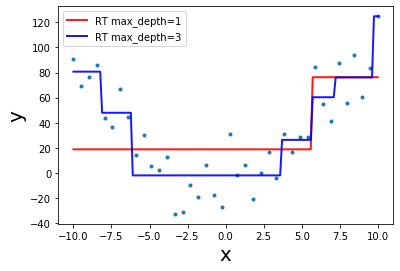

In [3]:
# Example of a simple regression tree (no boosting or gradient boosting)

#Reshape x: 
x_train = x[:, np.newaxis]
y_train = y[:, np.newaxis]

new_x = np.linspace(-10, 10, 4*N)

from sklearn.tree import DecisionTreeRegressor
plotdata()
DT = DecisionTreeRegressor(max_depth=1).fit(x_train, y_train) 
plt.plot(new_x, DT.predict(new_x[:, np.newaxis]),
         label='RT max_depth=1', color='r', alpha=0.9, linewidth=2)

DT = DecisionTreeRegressor(max_depth=3).fit(x_train, y_train) 
plt.plot(new_x, DT.predict(new_x[:, np.newaxis]),
         label='RT max_depth=3', color='b', alpha=0.9, linewidth=2)

plt.legend(loc='upper left')
plt.show()

## Gradient Boosted Decision Trees

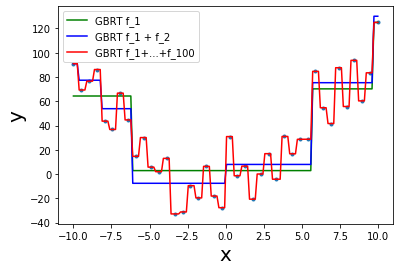

In [4]:
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor

plotdata()
DT = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=1.0)
DT.fit(x_train, y)

ax = plt.gca() 

# step through prediction as we add 10 more trees.
colorvector = ['g','b']
legendvector = ['f_1',"f_1 + f_2"]
i = 0
for pred in islice(DT.staged_predict(new_x[:, np.newaxis]), 0, 2, 1):
    plt.plot(new_x, pred, color=colorvector[i], alpha=1,label='GBRT '+legendvector[i])
    i += 1

pred = DT.predict(new_x[:, np.newaxis])
plt.plot(new_x, pred, color='r', label='GBRT f_1+...+f_'+str(DT.n_estimators))

plt.legend(loc='upper left')
plt.show()

## Extra: What about expanding the Taylor series?
$$
\operatorname{Score}^{(k)}=\sum_{i=1}^{N} l\left(y_{i}, \hat{y}_{i}^{(k-1)}+f_{k}\left(x_{i}\right)\right)+\sum_{m=1}^{k} \Omega\left(f_{m}\right)
$$
$\cdot$ Consider the Taylor expansion of the score:
- Recall that $f(x+\Delta x) \approx f(x)+\frac{d}{d x} f(x) \Delta x+\frac{1}{2} \frac{d^{2}}{d x^{2}} f(x) \Delta x^{2}$
- Define
$$
h_{i}^{(k)}=\frac{\partial}{\partial \hat{y}^{(k-1)}} l\left(y_{i}, \hat{y}^{(k-1)}\right)
$$
and
$$
g_{i}^{(k)}=\frac{\partial^{2}}{\partial^{2} \hat{y}^{(k-1)}} l\left(y_{i}, \hat{y}^{(k-1)}\right)
$$
Then, the Taylor series approximation yields:
$$
\begin{aligned}
\mathrm{Score}^{(k)} & \approx \sum_{i=1}^{N}\left(l\left(y_{i}, \hat{y}_{i}^{(k-1)}\right)+h_{i}^{(k)} f_{k}\left(x_{i}\right)+\frac{1}{2} g_{i}^{(k)} f_{k}\left(x_{i}\right)^{2}\right)+\Omega\left(f_{k}\right) \\
& \approx \sum_{i=1}^{N}\left(h_{i}^{(k)} f_{k}\left(x_{i}\right)+\frac{1}{2} g_{i}^{(k)} f_{k}\left(x_{i}\right)^{2}\right)+\Omega\left(f_{k}\right)+\mathrm{constant}
\end{aligned}
$$
where in the last equation we used the fact that at the $k$ -th iteration, $l\left(y_{i}, \hat{y}_{i}^{(k-1)}\right)$ is constant.
If we define the tree complexity as
$$
\Omega\left(f_{k}\right)=\gamma J^{(k)}+\frac{1}{2} \lambda \sum_{j=1}^{J} w_{j}^{2}
$$
where $w_{j}$ is the prediction given by leaf $j,$ i.e., $w_{q^{(k)}\left(x_{i}\right)}=f\left(x_{i}\right)$
The final score will be
$$
\begin{aligned}
\mathrm{Score}^{(k)} & \approx \sum_{i=1}^{N}\left(h_{i}^{(k)} f_{k}\left(x_{i}\right)+\frac{1}{2} g_{i}^{(k)} f_{k}\left(x_{i}\right)^{2}\right)+\gamma J^{(k)}+\frac{1}{2} \lambda \sum_{j=1}^{J} w_{j}^{2}+\text { constant } \\
& \approx \sum_{j=1}^{J}\left(\sum_{i \in I_{j}} h_{i}^{(k)}\right) w_{j}+\frac{1}{2}\left(\sum_{i \in I_{j}} g_{i}^{(k)}+\lambda\right) w_{j}^{2}+\gamma J^{(k)}+\text { constant }
\end{aligned}
$$


## References

* J.H. Friedman, Greedy function approximation a gradient boosting machine, 2001.
    - First paper on gradient boosting
* J.H. Friedman, Stochastic Gradient Boosting, 2002.
    - Presents a stochastic gradient version of gradient boosting.
* Elements of Statistical Learning. T. Hastie, R. Tibshirani and J.H. Friedman
    -  Contains a chapter about gradient boosted boosting
* J.H. Friedman T. Hastie R. Tibshirani, Additive logistic regression a statistical view of boosting, 2000.
    - Uses second-order statistics for tree splitting, which is related to the expanded Taylor series.

